In [1]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import fetch_data as fd
import geopandas as gpd
import matplotlib.patheffects as pe
import contextily
import sklearn as sk

from fetch_data import fetch_traffic_data
from fetch_data import get_city_info
fetch_traffic_data()
get_city_info()

Already have 2016.csv, skipping...
Already have 2017.csv, skipping...
Already have 2018.csv, skipping...
Already have 2019.csv, skipping...
Already have 2020.csv, skipping...
Already have 2021.csv, skipping...
Already have 2022.csv, skipping...
Already have 2023.csv, skipping...
Already have 2024.csv, skipping...


regional key               city   sq km  population
0        11000000             Berlin  891.12     3685265
1        02000000            Hamburg  755.09     1862565
2        09162000            München  310.70     1505005
3        05315000               Köln  405.02     1024621
4        06412000  Frankfurt am Main  248.31      756021
...           ...                ...     ...         ...
2054     16075127         Ziegenrück    8.25         626
2055     16071061            Neumark    8.67         462
2056     16069052         Ummerstadt   15.73         455
2057     03354021      Schnackenburg   23.70         447
2058     01059002              Arnis    0.45         251

[2059 rows x 4 columns]

In [2]:
YEARS = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
df_dict = fd.get_dfs(YEARS)
df = pd.concat(df_dict.values())
city_info = fd.get_city_info()
df.describe()

OID_         UJAHR        UMONAT       USTUNDE    UWOCHENTAG  \
count  2.098019e+06  2.098019e+06  2.098019e+06  2.098019e+06  2.098019e+06   
mean   1.196338e+05  2.020357e+03  6.754927e+00  1.333360e+01  4.099909e+00   
std    7.185906e+04  2.490690e+00  3.203685e+00  4.788369e+00  1.873301e+00   
min    1.000000e+00  2.016000e+03  1.000000e+00  0.000000e+00  1.000000e+00   
25%    5.827900e+04  2.018000e+03  4.000000e+00  1.000000e+01  3.000000e+00   
50%    1.165570e+05  2.020000e+03  7.000000e+00  1.400000e+01  4.000000e+00   
75%    1.777310e+05  2.023000e+03  9.000000e+00  1.700000e+01  6.000000e+00   
max    2.690480e+05  2.024000e+03  1.200000e+01  2.300000e+01  7.000000e+00   

         UKATEGORIE          UART         UTYP1    ULICHTVERH   USTRZUSTAND  \
count  2.098019e+06  2.098019e+06  2.098019e+06  2.098019e+06  2.098019e+06   
mean   2.800768e+00  3.871103e+00  3.827973e+00  4.320318e-01  2.791309e-01   
std    4.232954e-01  2.626432e+00  2.152959e+00  7.898641e-01  4.944200e-01   
min    1.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    3.000000e+00  2.000000e+00  2.000000e+00  0.000000e+00  0.000000e+00   
50%    3.000000e+00  4.000000e+00  3.000000e+00  0.000000e+00  0.000000e+00   
75%    3.000000e+00  5.000000e+00  6.000000e+00  0.000000e+00  1.000000e+00   
max    3.000000e+00  9.000000e+00  7.000000e+00  2.000000e+00  2.000000e+00   

             IstRad        IstPKW       IstFuss       IstKrad       IstGkfz  \
count  2.098019e+06  2.098019e+06  2.098019e+06  2.098019e+06  1.902790e+06   
mean   2.987790e-01  7.728147e-01  8.796536e-02  1.382752e-01  4.725167e-02   
std    4.577228e-01  4.190134e-01  2.832446e-01  3.451887e-01  2.121767e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

        IstSonstige       LINREFX       LINREFY     XGCSWGS84     YGCSWGS84  
count  2.098019e+06  2.098019e+06  2.098019e+06  2.098019e+06  2.098019e+06  
mean   1.155952e-01  5.595002e+05  5.623096e+06  9.845719e+00  5.073774e+01  
std    3.197390e-01  1.461430e+05  2.039809e+05  2.083310e+00  1.831311e+00  
min    0.000000e+00  2.804374e+05  5.240628e+06  5.867262e+00  4.731220e+01  
25%    0.000000e+00  4.471891e+05  5.448162e+06  8.253147e+00  4.917560e+01  
50%    0.000000e+00  5.466854e+05  5.636976e+06  9.670647e+00  5.084954e+01  
75%    0.000000e+00  6.796106e+05  5.792010e+06  1.147224e+01  5.226652e+01  
max    1.000000e+00  9.204492e+05  6.100725e+06  1.502868e+01  5.505184e+01

In [3]:
Frankfurt = df[df["Community_key"] == "06412000"]
Frankfurt.shape
Frankfurt.groupby("UKATEGORIE").size()

UKATEGORIE
1      107
2     2760
3    19633
dtype: int64

In [4]:
Frankfurt.head()

OID_ ULAND UREGBEZ UKREIS UGEMEINDE  UJAHR  UMONAT  USTUNDE  UWOCHENTAG  \
8575  8576    06       4     12       000   2016       1       19           7   
8664  8665    06       4     12       000   2016       1        0           1   
8978  8979    06       4     12       000   2016       1       15           7   
9024  9025    06       4     12       000   2016       1        2           1   
9074  9075    06       4     12       000   2016       1        3           6   

      UKATEGORIE  ...  IstFuss  IstKrad  IstGkfz  IstSonstige      LINREFX  \
8575           3  ...        0        0      0.0            0  471854.4512   
8664           3  ...        0        0      0.0            0  465949.1018   
8978           1  ...        0        0      0.0            0  467209.1346   
9024           2  ...        0        0      0.0            0  475327.1534   
9074           3  ...        0        0      0.0            0  477911.2036   

           LINREFY  XGCSWGS84  YGCSWGS84  Community_key        UID  
8575  5.545148e+06   8.606800  50.057949       06412000  2016_8576  
8664  5.551119e+06   8.523772  50.111344       06412000  2016_8665  
8978  5.550947e+06   8.541409  50.109870       06412000  2016_8979  
9024  5.547310e+06   8.655174  50.077547       06412000  2016_9025  
9074  5.548912e+06   8.691196  50.092058       06412000  2016_9075  

[5 rows x 26 columns]

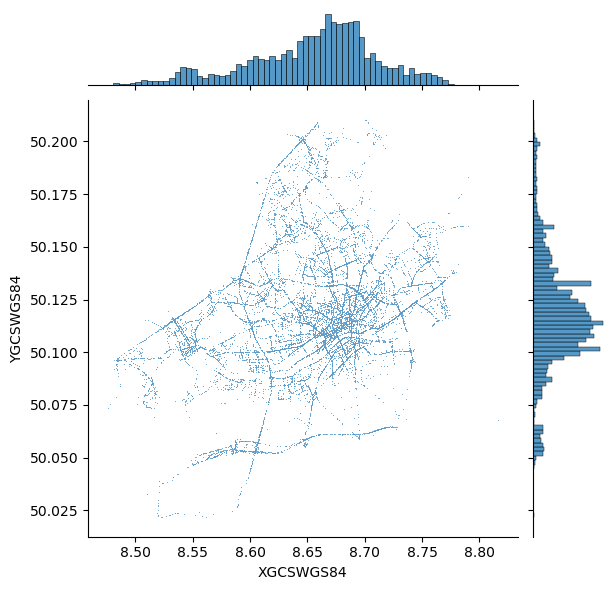

In [5]:
# Generate scatter plot
sns.jointplot(x="XGCSWGS84", y="YGCSWGS84", data=Frankfurt, s=0.5)


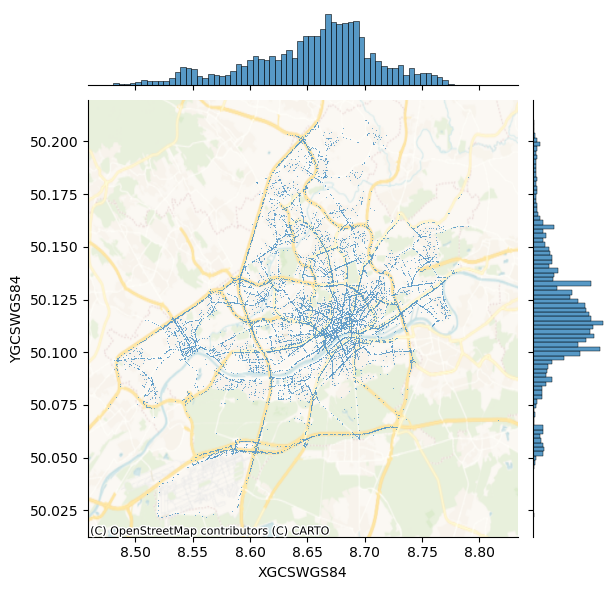

In [6]:
# Generate scatter plot
joint_axes = sns.jointplot(
    x="XGCSWGS84", y="YGCSWGS84", data=Frankfurt, s=0.5
)
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.VoyagerNoLabels,
);

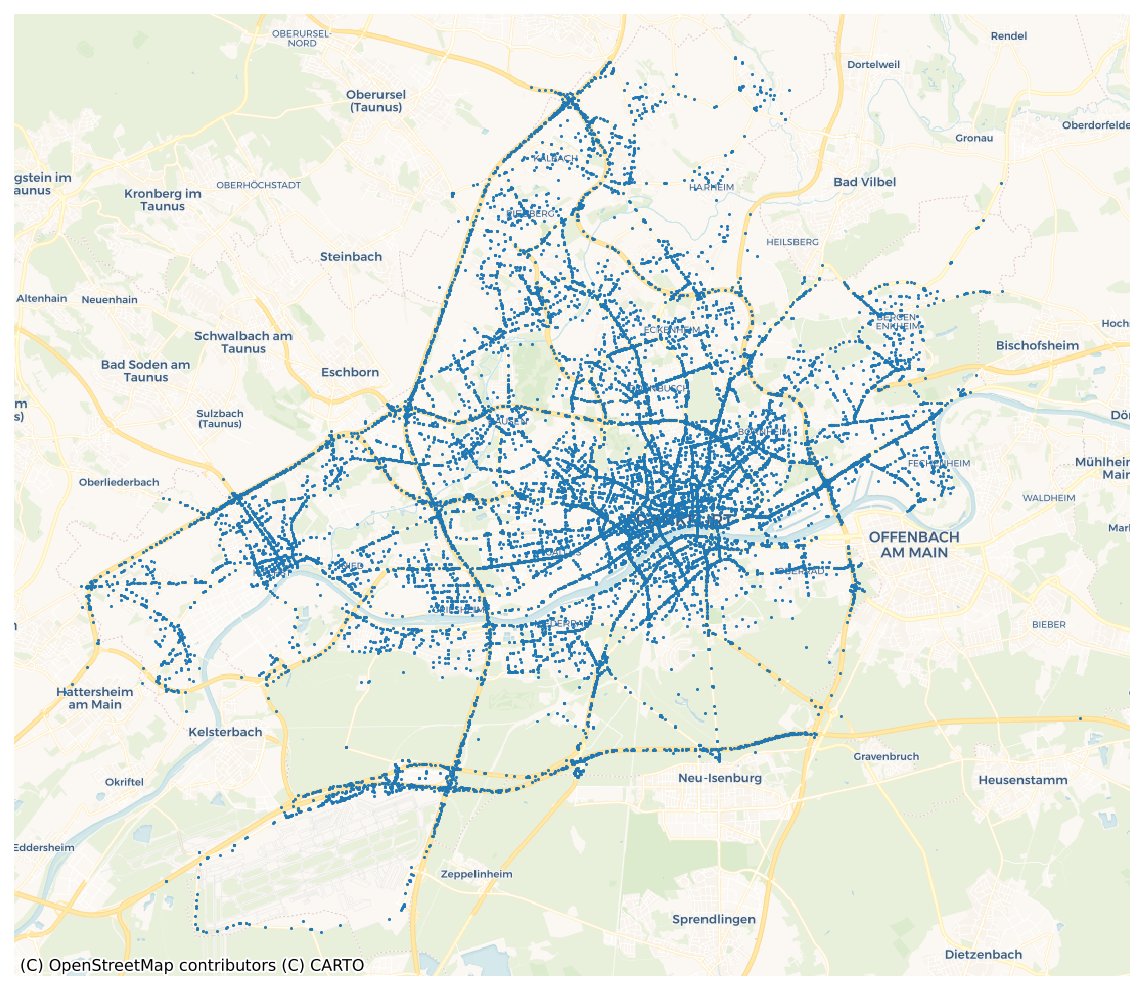

In [7]:
gdf = gpd.GeoDataFrame(
    Frankfurt,
    geometry=gpd.points_from_xy(Frankfurt.XGCSWGS84, Frankfurt.YGCSWGS84),
    crs="EPSG:4326"  # Tell it the coordinates are Lat/Lon
)
# 2. Convert (re-project) the data to Web Mercator (the map's projection)
gdf_wm = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(10, 10), dpi=144)

gdf_wm.plot(ax=ax, markersize=0.3, alpha=1)
contextily.add_basemap(
    ax,
    #source=contextily.providers.CartoDB.PositronNoLabels
    #source=contextily.providers.OpenStreetMap.Mapnik
    source=contextily.providers.CartoDB.Voyager, zoom=12, interpolation='None'
)
ax.set_axis_off()

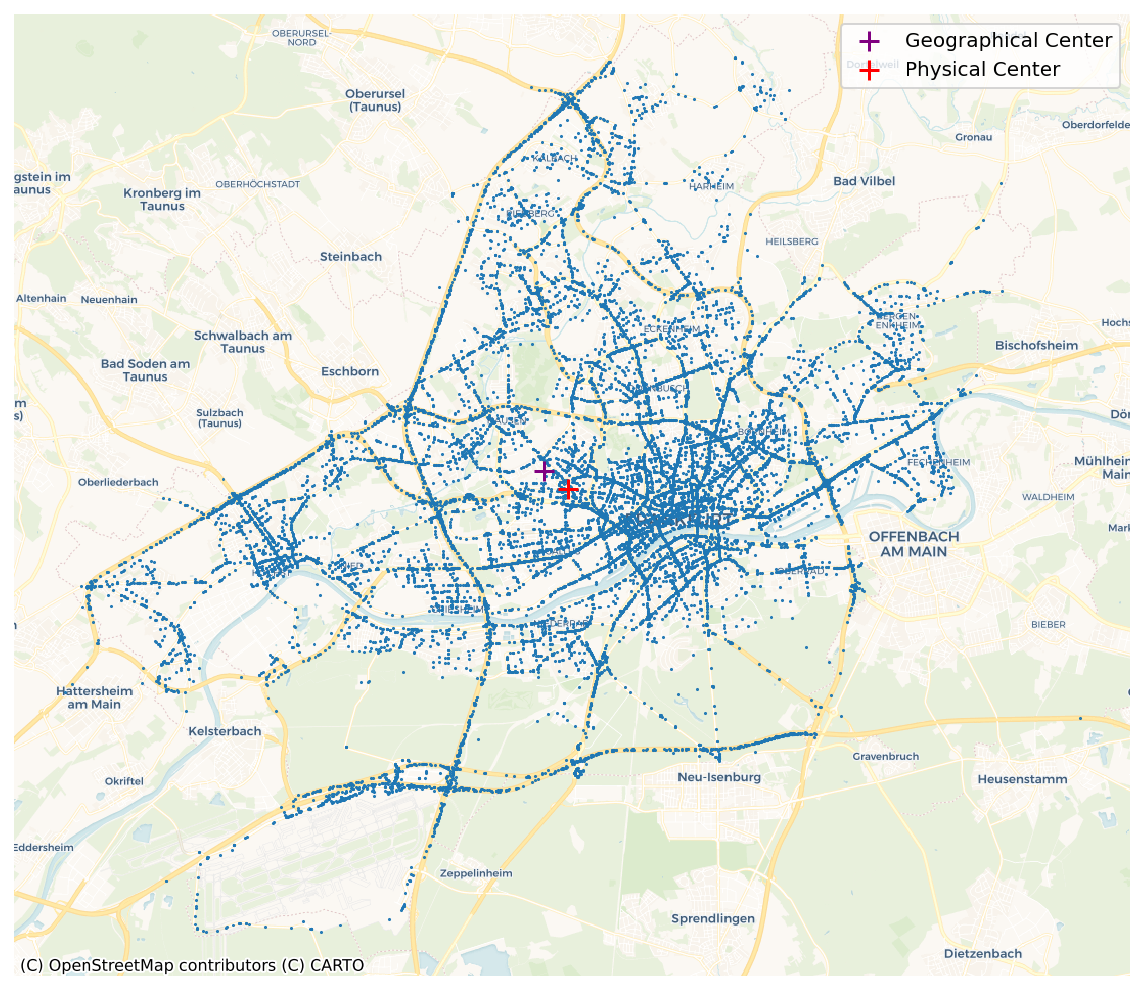

In [9]:
from shapely.geometry import Point
gdf = gpd.GeoDataFrame(
    Frankfurt,
    geometry=gpd.points_from_xy(Frankfurt.XGCSWGS84, Frankfurt.YGCSWGS84),
    crs="EPSG:4326"  # Tell it the coordinates are Lat/Lon
)

# Convert (re-project) the data to Web Mercator (the map's projection)
gdf_wm = gdf.to_crs(epsg=3857)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 10), dpi=144)

#Plot main data
gdf_wm.plot(ax=ax, markersize=0.3, alpha=1)


# 5. Define and plot the FIRST point (Green Cross)
point1_latlon = Point(8.636583, 50.121250)
point1_gdf = gpd.GeoDataFrame(geometry=[point1_latlon], crs="EPSG:4326")
point1_gdf_wm = point1_gdf.to_crs(epsg=3857)

point1_gdf_wm.plot(
    ax=ax,
    marker='+',
    color='Purple',
    markersize=100,
    label="Geographical Center"
)

# 6. Define and plot the SECOND point (Blue Cross)
point2_latlon = Point(8.644417, 50.117306)
point2_gdf = gpd.GeoDataFrame(geometry=[point2_latlon], crs="EPSG:4326")
point2_gdf_wm = point2_gdf.to_crs(epsg=3857)

point2_gdf_wm.plot(
    ax=ax,
    marker='+',
    color='red',
    markersize=100,
    label="Physical Center"
)

contextily.add_basemap(
    ax,
    crs=gdf_wm.crs,  # Use the CRS from our projected data
    source=contextily.providers.CartoDB.Voyager, 
    zoom=12, 
    interpolation='None'
)
ax.set_axis_off()
ax.legend()
plt.show()

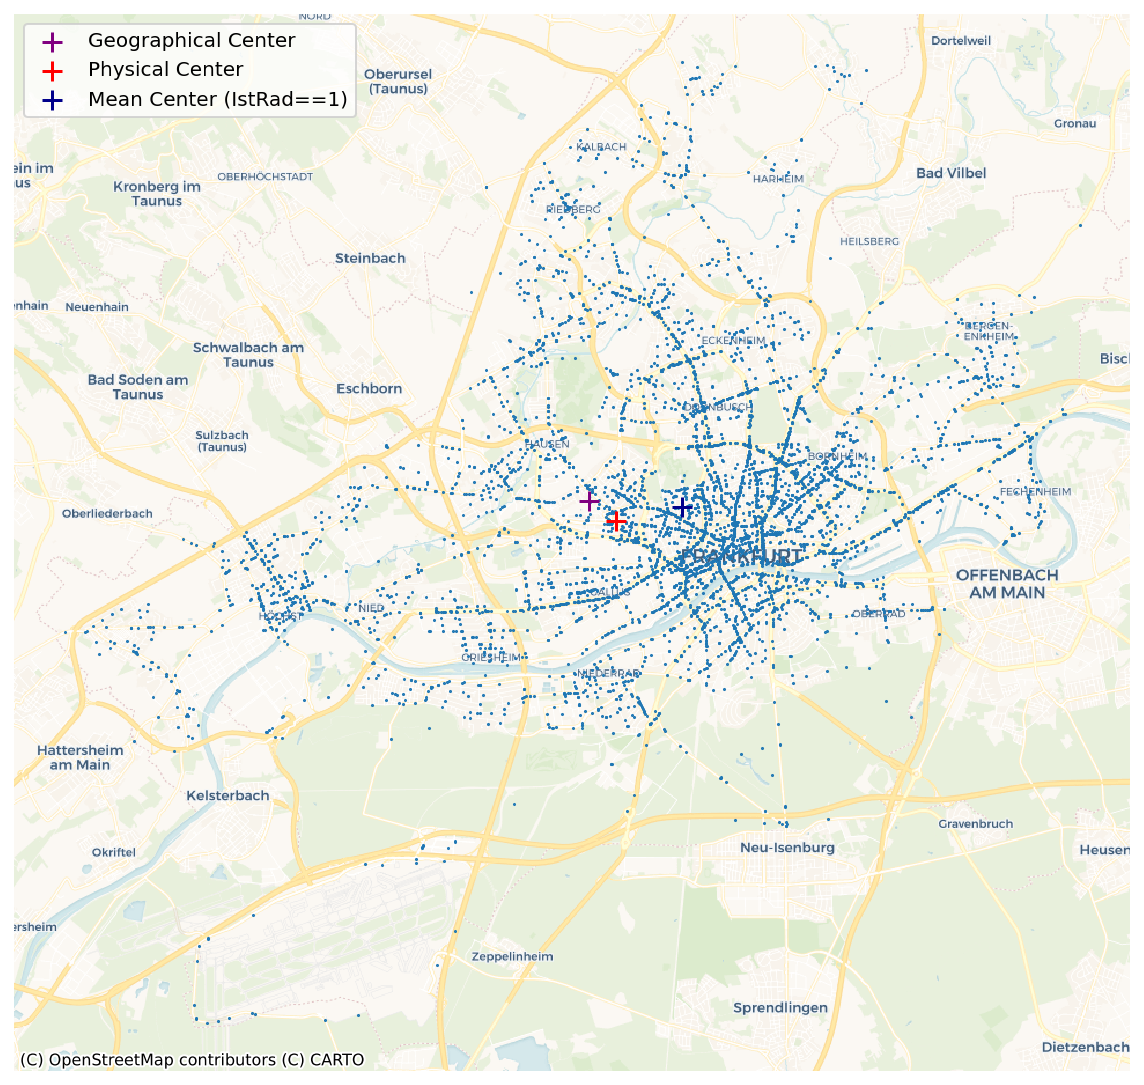

In [167]:
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily


gdf = gpd.GeoDataFrame(
    Frankfurt,
    geometry=gpd.points_from_xy(Frankfurt.XGCSWGS84, Frankfurt.YGCSWGS84),
    crs="EPSG:4326"  # Tell it the coordinates are Lat/Lon
)

# We filter gdf to only keep rows where IstRad is 1
gdf = gdf.loc[gdf['IstRad'] == 1].copy()
gdf_wm = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10), dpi=144)
gdf_wm.plot(ax=ax, markersize=0.3, alpha=1)

# Geographical Center
point1_latlon = Point(8.636583, 50.121250)
point1_gdf = gpd.GeoDataFrame(geometry=[point1_latlon], crs="EPSG:4326")
point1_gdf_wm = point1_gdf.to_crs(epsg=3857)

point1_gdf_wm.plot(
    ax=ax,
    marker='+',
    color='Purple',
    markersize=100,
    label="Geographical Center"
)

# Physical Center
point2_latlon = Point(8.644417, 50.117306)
point2_gdf = gpd.GeoDataFrame(geometry=[point2_latlon], crs="EPSG:4326")
point2_gdf_wm = point2_gdf.to_crs(epsg=3857)

point2_gdf_wm.plot(
    ax=ax,
    marker='+',
    color='red',
    markersize=100,
    label="Physical Center"
)

# Calculate the mean of the accident points geolocation
mean_lon = gdf['XGCSWGS84'].mean()
mean_lat = gdf['YGCSWGS84'].mean()

# Create a Point and GeoDataFrame in EPSG:4326
mean_center_latlon = Point(mean_lon, mean_lat)
mean_center_gdf = gpd.GeoDataFrame(geometry=[mean_center_latlon], crs="EPSG:4326")

# Reproject to Web Mercator for plotting
mean_center_gdf_wm = mean_center_gdf.to_crs(epsg=3857)

# Plot the mean center as a green cross
mean_center_gdf_wm.plot(
    ax=ax,
    marker='+',
    color='darkblue',  # As requested
    markersize=100,
    label="Mean Center (IstRad==1)"
)
# --- END OF NEW CODE BLOCK ---

contextily.add_basemap(
    ax,
    crs=gdf_wm.crs,  # Use the CRS from our projected data
    source=contextily.providers.CartoDB.Voyager,
    zoom=12,
    interpolation='None'
)
ax.set_axis_off()
ax.legend()  # This will now include the "Mean Center" label
plt.show()

City Districts loaded.


C:\Users\Adria\AppData\Local\Temp\ipykernel_2836\2469306832.py:81: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


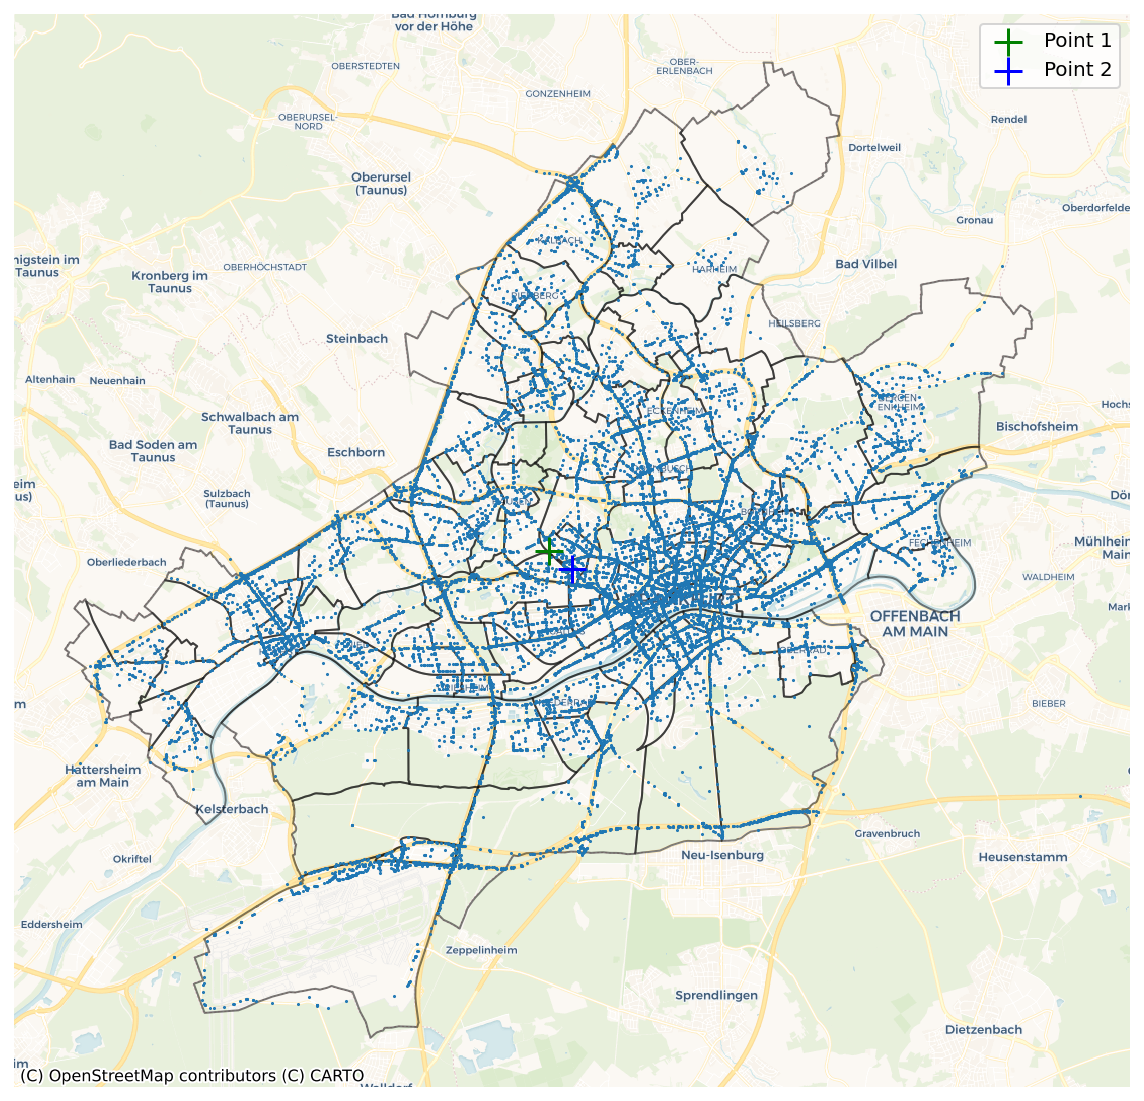

In [10]:
gdf = gpd.GeoDataFrame(
    Frankfurt,
    geometry=gpd.points_from_xy(Frankfurt.XGCSWGS84, Frankfurt.YGCSWGS84),
    crs="EPSG:4326"
)
gdf_wm = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10), dpi=144)

wfs_url = "https://geowebdienste.frankfurt.de/WFS_Stadtgebietsgliederung?request=GetFeature&service=WFS&version=1.1.0&typeName=Stadtgebietsgliederung:Stadtbezirke&outputFormat=GML3"

try:
    districts_gdf = gpd.read_file(wfs_url)
    print("City Districts loaded.")
    
    # Re-project
    districts_gdf_wm = districts_gdf.to_crs(epsg=3857)
    
    districts_gdf_wm.plot(
        ax=ax,
        facecolor='none', # No fill
        edgecolor='black',  # Black outlines
        linewidth=1.0,
        alpha=0.5,         # Semi-transparent outlines
        label="City Districts"
    )
except Exception as e:
    print(f"WARNING: Could not load City Districts from WFS. Skipping this layer. Error: {e}")

shapefile_path = "roads.zip" 

try:
    roads_gdf = gpd.read_file(shapefile_path)
    print("Road network loaded.")
    roads_gdf_wm = roads_gdf.to_crs(epsg=3857)
    
    roads_gdf_wm.plot(
        ax=ax,
        edgecolor='gray',
        linewidth=0.5,
        alpha=0.7,
        label="Road Network"
    )
except Exception as e:
    print(f"WARNING: Could not load 'roads.zip'. Make sure it's in the same folder as your script. Skipping this layer. Error: {e}")

gdf_wm.plot(ax=ax, markersize=0.3, alpha=1)

point1_latlon = Point(8.636583, 50.121250)
point1_gdf = gpd.GeoDataFrame(geometry=[point1_latlon], crs="EPSG:4326")
point1_gdf_wm = point1_gdf.to_crs(epsg=3857)

point1_gdf_wm.plot(
    ax=ax,
    marker='+',
    color='green',
    markersize=200,
    label="Point 1"
)

point2_latlon = Point(8.644417, 50.117306)
point2_gdf = gpd.GeoDataFrame(geometry=[point2_latlon], crs="EPSG:4326")
point2_gdf_wm = point2_gdf.to_crs(epsg=3857)

point2_gdf_wm.plot(
    ax=ax,
    marker='+',
    color='blue',
    markersize=200,
    label="Point 2"
)
contextily.add_basemap(
    ax,
    crs=gdf_wm.crs,
    source=contextily.providers.CartoDB.Voyager, 
    zoom=12, 
    interpolation='None'
)

ax.set_axis_off()
ax.legend()
plt.show()

Below we are trying to get a feeling for appropriate eps values for parameter selection, by creating a k-distance graph. By checking where the graph has its "elbow", we can identify approximatily which distance will give us a good clustering result. In our case this is around 150-200 meters. Since we want to find just a couple main intersections of concern, we will choose an eps value, below the elbow curve. 

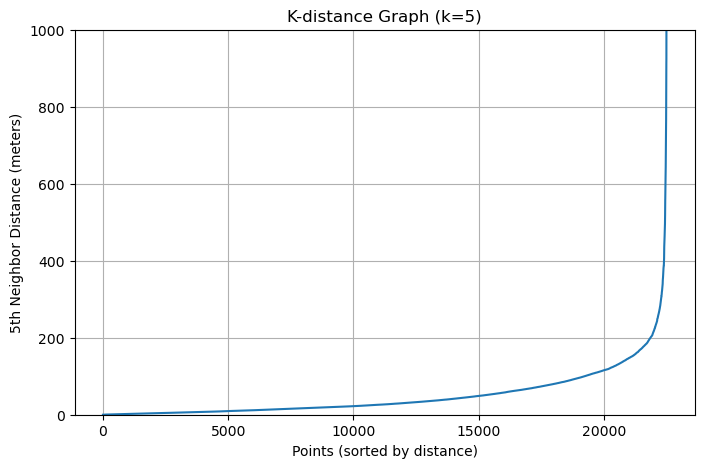

In [158]:
from sklearn.neighbors import NearestNeighbors
data_for_clustering = Frankfurt[["LINREFX", "LINREFY"]]

k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(data_for_clustering)
distances, indices = neighbors_fit.kneighbors(data_for_clustering)
k_distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.title('K-distance Graph (k=5)')
plt.xlabel('Points (sorted by distance)')
plt.ylabel(f'{k}th Neighbor Distance (meters)')
plt.grid(True)
plt.ylim(0, 1000)
plt.show()

--- Run Complete ---
Eps: 100, Min Samples: 85
Found 4 clusters
----------------------


C:\Users\Adria\AppData\Local\Temp\ipykernel_2836\886625311.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(cluster_ids))


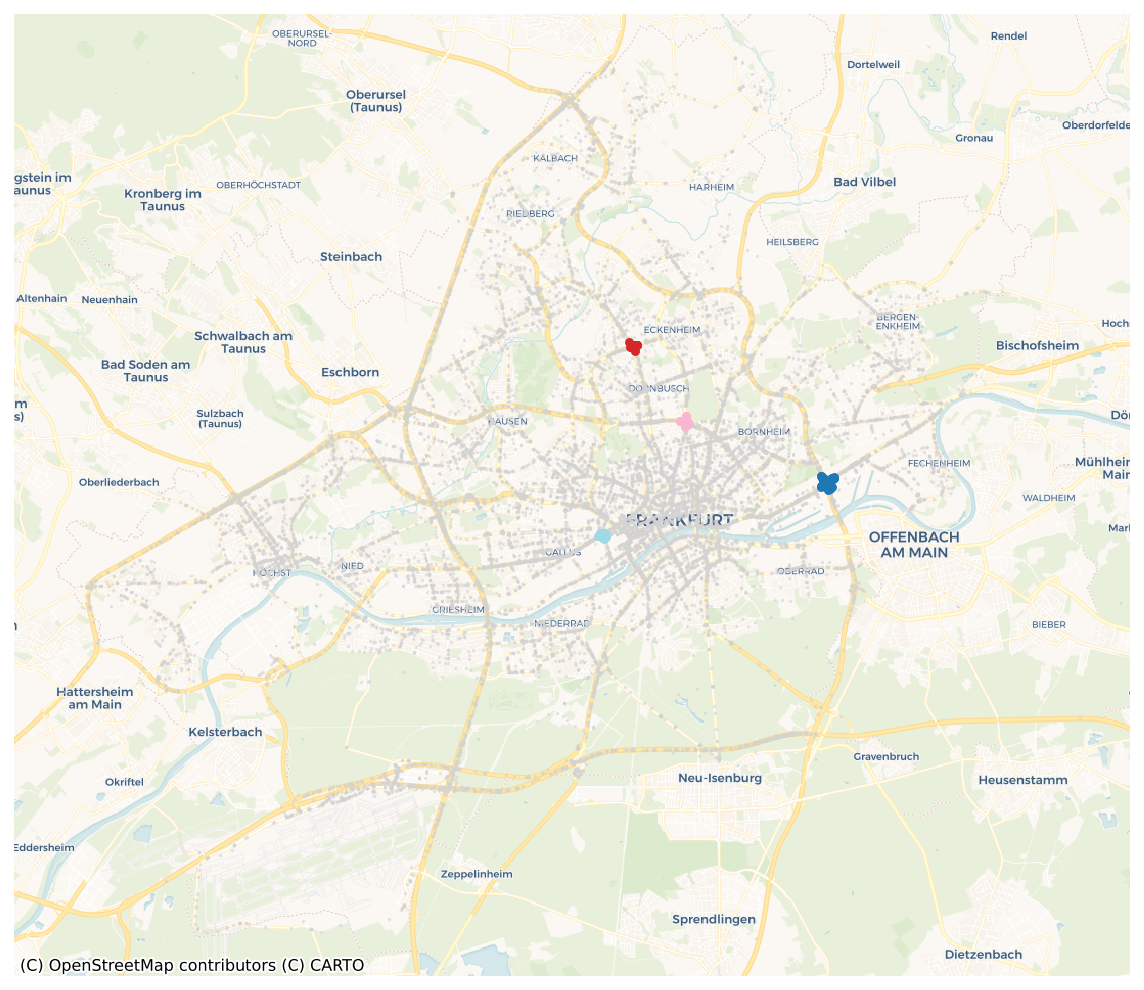

In [163]:
from sklearn.cluster import DBSCAN

# Parameters for tuning
current_eps = 100
current_min_samples = 85

# Call and fit DBSCAN
clusterer = DBSCAN(
    metric='euclidean', 
    eps=current_eps,
    min_samples=current_min_samples
)
clusterer.fit(Frankfurt[["LINREFX", "LINREFY"]])

# Ger labels and assign
lbls = clusterer.labels_
Frankfurt.loc[:, 'labels'] = lbls

# Print findings
unique_labels = np.unique(lbls)
num_clusters = len(unique_labels[unique_labels != -1])
print(f"--- Run Complete ---")
print(f"Eps: {current_eps}, Min Samples: {current_min_samples}")
print(f"Found {num_clusters} clusters")
print("----------------------")

# Geodataframe
gdf = gpd.GeoDataFrame(
    Frankfurt,
    geometry=gpd.points_from_xy(Frankfurt.XGCSWGS84, Frankfurt.YGCSWGS84),
    crs="EPSG:4326"
)
gdf_wm = gdf.to_crs(epsg=3857)

# Plot results
fig, ax = plt.subplots(figsize=(10, 10), dpi=144)

# Plot noise
noise_wm = gdf_wm[gdf_wm['labels'] == -1]
noise_wm.plot(ax=ax, color='lightgrey', markersize=0.5, alpha=0.5, label='Noise')

# Get all unique cluster IDs (all non noise clusters)
cluster_ids = unique_labels[unique_labels != -1]

# Colors
colors = plt.cm.get_cmap('tab20', len(cluster_ids))

# Plot each cluster individually
for i, cluster_id in enumerate(cluster_ids):
    cluster_subset = gdf_wm[gdf_wm['labels'] == cluster_id]
    cluster_subset.plot(
        ax=ax,
        color=colors(i),
        markersize=12,
        label=f'Cluster {cluster_id}'
    )

# Add basemap
contextily.add_basemap(
    ax,
    source=contextily.providers.CartoDB.Voyager,
    zoom=12,
    interpolation='None'
)
ax.set_axis_off()
plt.show()

In [165]:
# Filter out noise points (label == -1)
clusters_df = Frankfurt[Frankfurt['labels'] != -1]

# Check if any clusters were found
if clusters_df.empty:
    print("No clusters found (only noise).")
else:
    # Group by cluster label and get the mean of the Lat/Lon columns
    cluster_centers = clusters_df.groupby('labels')[['YGCSWGS84', 'XGCSWGS84']].mean()
    
    # Rename columns for clarity
    cluster_centers = cluster_centers.rename(columns={
        'YGCSWGS84': 'Latitude',
        'XGCSWGS84': 'Longitude'
    })
    
    # Create Google Maps link
    def create_gmaps_link(row):
        return f"https://www.google.com/maps/search/?api=1&query={row['Latitude']},{row['Longitude']}"
    
    cluster_centers['Google_Maps_Link'] = cluster_centers.apply(create_gmaps_link, axis=1)
    
    # Print the results
    pd.set_option('display.max_colwidth', None)
    print("--- Cluster Center Coordinates ---")
    print(cluster_centers)

--- Cluster Center Coordinates ---
         Latitude  Longitude  \
labels                         
0       50.118726   8.731378   
1       50.148025   8.666328   
2       50.131795   8.683852   
3       50.107326   8.656040   

                                                                           Google_Maps_Link  
labels                                                                                       
0        https://www.google.com/maps/search/?api=1&query=50.11872602334982,8.73137784321529  
1       https://www.google.com/maps/search/?api=1&query=50.14802549700004,8.666327938444482  
2       https://www.google.com/maps/search/?api=1&query=50.13179462461391,8.683851999604004  
3       https://www.google.com/maps/search/?api=1&query=50.10732622077533,8.656040092415775  
